In [ ]:
import pandas as pd
import nltk

from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet, stopwords
import string
import re
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')  

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ghastly\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Ghastly\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ghastly\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ghastly\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Ghastly\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [40]:
df = pd.read_csv('reddit_data.csv')

df.head(10)

,subreddit,year,month,text,created_utc
0,callofduty,2020,6,Well said. [Cod],2020-06-15 23:56:34
1,callofduty,2020,9,[MW] Perfection,2020-09-19 21:08:24
2,callofduty,2020,6,They get no mercy [MW2],2020-06-17 18:16:03
3,callofduty,2020,7,[COD] Only OGs remember,2020-07-27 17:04:09
4,callofduty,2020,8,[MW] Campwarfare,2020-08-03 11:25:22
5,callofduty,2020,12,[COD] So accurate,2020-12-13 23:16:44
6,callofduty,2020,4,[MW2] Most Satisfaction I Ever Had!!,2020-04-03 13:42:43
7,callofduty,2020,8,[MW2] ah yes,2020-08-13 04:53:05
8,callofduty,2020,10,[MW2] The Last Thing Generald Sheperd Ever Saw,2020-10-09 16:16:25
9,callofduty,2020,10,[MW2] Stolen on Twitter,2020-10-04 11:31:59


In [41]:
clean_df = df.dropna(subset=['text']) 


In [42]:
def lowercase(x): 
    return " ".join(x.lower() for x in x.split()) 

clean_df['text'] = clean_df['text'].apply(lowercase)
clean_df.head(10) 


,subreddit,year,month,text,created_utc
0,callofduty,2020,6,well said. [cod],2020-06-15 23:56:34
1,callofduty,2020,9,[mw] perfection,2020-09-19 21:08:24
2,callofduty,2020,6,they get no mercy [mw2],2020-06-17 18:16:03
3,callofduty,2020,7,[cod] only ogs remember,2020-07-27 17:04:09
4,callofduty,2020,8,[mw] campwarfare,2020-08-03 11:25:22
5,callofduty,2020,12,[cod] so accurate,2020-12-13 23:16:44
6,callofduty,2020,4,[mw2] most satisfaction i ever had!!,2020-04-03 13:42:43
7,callofduty,2020,8,[mw2] ah yes,2020-08-13 04:53:05
8,callofduty,2020,10,[mw2] the last thing generald sheperd ever saw,2020-10-09 16:16:25
9,callofduty,2020,10,[mw2] stolen on twitter,2020-10-04 11:31:59


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
clean_df[clean_df['text'].str.contains('https')]


In [44]:
poll_md_pattern = re.compile(r'\[view poll\]\(https://www\.reddit\.com/poll[^\)]*\)', re.IGNORECASE)
poll_garbage_pattern = re.compile(r'viewpollhttpswwwredditcompoll\S*', re.IGNORECASE)
url_pattern = re.compile(r'https?://\S+', re.IGNORECASE)

def remove_polls(text):
    text = poll_md_pattern.sub('', text)
    text = poll_garbage_pattern.sub('', text)
    text = url_pattern.sub('', text)
    return text.strip()

clean_df['text'] = clean_df['text'].apply(remove_polls)

In [45]:
clean_df['text'] = clean_df['text'].str.replace('[^\w\s]', "", regex = True) 
clean_df.head(5) 


<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Ghastly\AppData\Local\Temp\ipykernel_20052\2333621489.py:1: SyntaxWarning: invalid escape sequence '\w'
  clean_df['text'] = clean_df['text'].str.replace('[^\w\s]', "", regex = True)


,subreddit,year,month,text,created_utc
0,callofduty,2020,6,well said cod,2020-06-15 23:56:34
1,callofduty,2020,9,mw perfection,2020-09-19 21:08:24
2,callofduty,2020,6,they get no mercy mw2,2020-06-17 18:16:03
3,callofduty,2020,7,cod only ogs remember,2020-07-27 17:04:09
4,callofduty,2020,8,mw campwarfare,2020-08-03 11:25:22


In [46]:
def deEmojify(x):
    emoji_pattern = re.compile("[" 
        u"\U0001F600-\U0001F64F"  
        u"\U0001F300-\U0001F5FF" 
        u"\U0001F680-\U0001F6FF"  
        u"\U0001F1E0-\U0001F1FF"  
        u"\U00002700-\U000027BF"  
        u"\U000024C2-\U0001F251"
    "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', str(x))

clean_df['text'] = clean_df['text'].apply(deEmojify)

In [47]:
stop = stopwords.words('english') 

def replace_stopwords(x): 
    x = " ".join(x for x in x.split() if x not in stop) 
    return x 

clean_df['text'] = clean_df['text'].apply(replace_stopwords) 
clean_df.head(10) 


,subreddit,year,month,text,created_utc
0,callofduty,2020,6,well said cod,2020-06-15 23:56:34
1,callofduty,2020,9,mw perfection,2020-09-19 21:08:24
2,callofduty,2020,6,get mercy mw2,2020-06-17 18:16:03
3,callofduty,2020,7,cod ogs remember,2020-07-27 17:04:09
4,callofduty,2020,8,mw campwarfare,2020-08-03 11:25:22
5,callofduty,2020,12,cod accurate,2020-12-13 23:16:44
6,callofduty,2020,4,mw2 satisfaction ever,2020-04-03 13:42:43
7,callofduty,2020,8,mw2 ah yes,2020-08-13 04:53:05
8,callofduty,2020,10,mw2 last thing generald sheperd ever saw,2020-10-09 16:16:25
9,callofduty,2020,10,mw2 stolen twitter,2020-10-04 11:31:59


In [48]:
wnl = WordNetLemmatizer()

def lemmatize_with_pos(text):
    return ' '.join([
        wnl.lemmatize(w, p[0].lower()) if p[0].lower() in ['a','n','v']
        else wnl.lemmatize(w)
        for w, p in pos_tag(word_tokenize(text))
    ])
clean_df['text'] = clean_df['text'].apply(lemmatize_with_pos)

In [49]:
before = len(clean_df)
clean_df = clean_df.drop_duplicates(subset='text').reset_index(drop=True)
after = len(clean_df)

print(f"Removed: {before - after}")

Removed: 2006


In [50]:
#.to_csv("preprocessed_redditData.csv", index=False, encoding='utf-8')

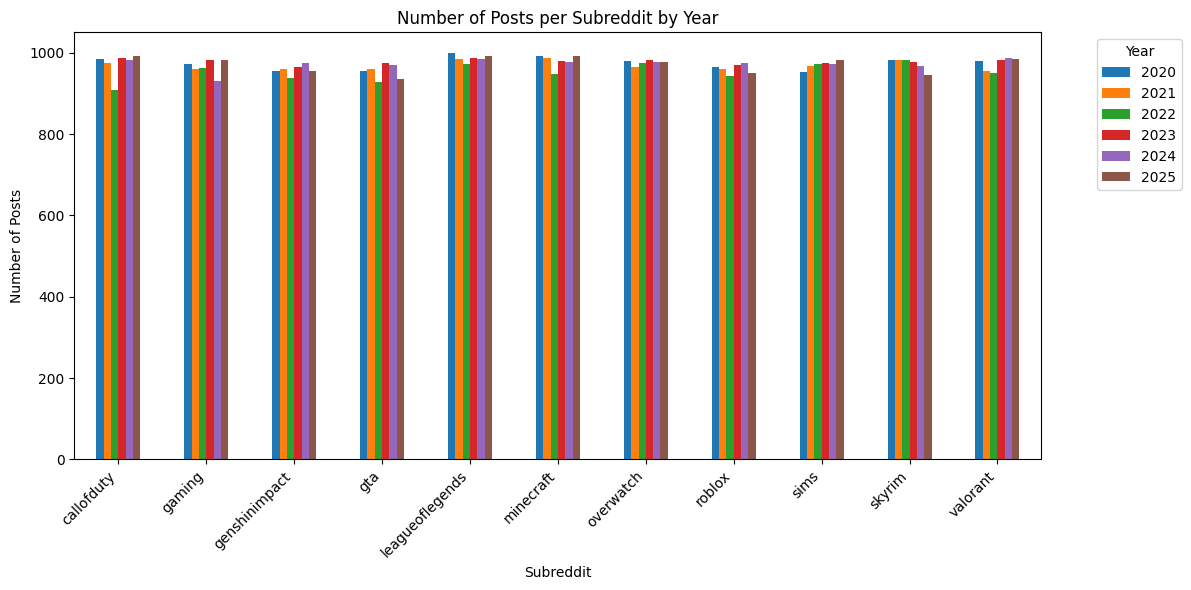

In [51]:
grouped = clean_df.groupby(['subreddit', 'year']).size().unstack(fill_value=0)
ax = grouped.plot(kind='bar', figsize=(12, 6))

plt.title('Number of Posts per Subreddit by Year')
plt.xlabel('Subreddit')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45, ha='right')

plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [52]:
print(grouped)

year             2020  2021  2022  2023  2024  2025
subreddit                                          
callofduty        984   975   907   988   981   991
gaming            973   960   962   981   931   983
genshinimpact     956   959   938   965   974   955
gta               955   960   929   975   970   935
leagueoflegends  1000   985   971   988   984   992
minecraft         991   986   948   979   977   991
overwatch         980   965   974   983   977   977
roblox            965   961   943   970   974   951
sims              953   967   971   975   972   981
skyrim            983   981   982   977   968   946
valorant          979   956   951   982   987   984


In [53]:
remove_text = {
    "sims": ['sims'],
    "callofduty": ['mw2', 'mw3', 'mw', 'cod', 'cod2', 'bo2', 'bo', 'bo3', 'warzones'],
    "overwatch": ['overwatch', 'overwatchs'],
    "leagueoflegends": ['league']
}

In [54]:
def remove_topic(row):
    text = row['text']
    subreddit = row['subreddit'].lower()
    specific_stop = remove_text.get(subreddit, [])
    text = " ".join(word for word in text.split() if word not in stop and word not in specific_stop)
    return text

clean_df['text'] = clean_df.apply(remove_topic, axis=1)
clean_df.head(10)

,subreddit,year,month,text,created_utc
0,callofduty,2020,6,well say,2020-06-15 23:56:34
1,callofduty,2020,9,perfection,2020-09-19 21:08:24
2,callofduty,2020,6,get mercy,2020-06-17 18:16:03
3,callofduty,2020,7,ogs remember,2020-07-27 17:04:09
4,callofduty,2020,8,campwarfare,2020-08-03 11:25:22
5,callofduty,2020,12,accurate,2020-12-13 23:16:44
6,callofduty,2020,4,satisfaction ever,2020-04-03 13:42:43
7,callofduty,2020,8,ah yes,2020-08-13 04:53:05
8,callofduty,2020,10,last thing generald sheperd ever saw,2020-10-09 16:16:25
9,callofduty,2020,10,steal twitter,2020-10-04 11:31:59


In [55]:
clean_df = clean_df.dropna(subset=['text']) 


In [56]:
grouped = clean_df.groupby(['subreddit', 'year']).size().unstack(fill_value=0)
print(grouped)

year             2020  2021  2022  2023  2024  2025
subreddit                                          
callofduty        984   975   907   988   981   991
gaming            973   960   962   981   931   983
genshinimpact     956   959   938   965   974   955
gta               955   960   929   975   970   935
leagueoflegends  1000   985   971   988   984   992
minecraft         991   986   948   979   977   991
overwatch         980   965   974   983   977   977
roblox            965   961   943   970   974   951
sims              953   967   971   975   972   981
skyrim            983   981   982   977   968   946
valorant          979   956   951   982   987   984


In [57]:
clean_df.to_csv("preprocessed_redditData-removedtopic.csv", index=False, encoding='utf-8')